<a href="https://colab.research.google.com/github/Emerson-Portfolio/Inmersion-Datos-Alura/blob/main/Analisis_Algoritmos_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELO REGRESION LOGISTICA

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
datos_dane = pd.read_csv('/content/drive/MyDrive/inmersion_datos/archivos-dane/datos_dane.csv')
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.0,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.0
1,3004369.0,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.0
2,3004375.0,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.0,NaN,11.0
3,3004380.0,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.0
4,3004383.0,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.0


In [3]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


In [4]:
#Los atibutos están nombrados de acuerdo a una codificación, se mejorarán los nombres
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [5]:
#Observamos que cambiaron los nombres de las columnas
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

In [6]:
#Calculo de medias de algunos atributos importantes
datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.893333,1.186667,1.853333,1.893333,1.560000,1.840000,1.493860e+06,1.160000,1.920000,1.680000,1.800000
Américas,1.383178,1.252336,1.981308,1.785047,1.607477,1.915888,2.672138e+06,1.056075,1.971963,1.719626,1.850467
Apogeo,1.650794,1.301587,1.746032,1.936508,1.682540,2.000000,1.837583e+06,1.079365,1.920635,1.650794,1.920635
Arborizadora,1.430108,1.301075,1.946237,1.881720,1.688172,1.838710,1.802297e+06,1.032258,1.881720,1.612903,1.817204
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.367347,1.326531,1.989796,1.979592,1.704082,1.867347,2.943731e+06,1.051020,1.948980,1.704082,1.938776


In [7]:
#Importamos la data inicial que serían los inmuebles
inmuebles = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles_bogota.csv')
inmuebles.head()


,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [16]:
#Cambiar las columnas con caracteres especiales en inmuebles
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
3418,Apartamento,Apartamento en venta en Fontibón,2,2,48,Fontibón,Fontibón,$ 260.000.000
5881,Apartamento,Apartamento en venta en El Retiro,3,3,83,El Retiro,CHAPINERO: Chicó Lago + El Refugio,$ 840.000.000
3310,Apartamento,Apartamento en venta en Portales Del Norte,3,2,86,Portales Del Norte,Britalia,$ 404.000.000
6779,Apartamento,Apartamento en venta en Teusaquillo,2,1,106,Teusaquillo,Teusaquillo,$ 330.000.000
2243,Apartamento,Apartamento en venta en Engativa,3,2,66,Engativa,Engativá,$ 330.000.000
4828,Apartamento,Apartamento en venta en Suba,3,1,53,Suba,Suba,$ 205.000.000
766,Apartamento,Apartamento en venta en Cedritos,3,2,85,Cedritos,Usaquén,$ 430.000.000
1578,Apartamento,Apartamento en venta en Lagos De Cordoba,3,3,77,Lagos De Cordoba,Niza,$ 500.000.000
2293,Casa,Casa en venta en Barrios Unidos,4,4,144,Barrios Unidos,Los Andes,$ 500.000.000
3910,Apartamento,Apartamento en venta en Chapinero Central,2,2,76,Chapinero Central,Localidad Chapinero resto,$ 482.000.000


In [17]:
#Ahora aplicar split a toda la columna, vamos a procesar esta columna para tener valores numéricos
#primero convierto todo a string con str
inmuebles.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

In [18]:
#Pero si quiero que no sea listas o series, si no, data frame
valor = inmuebles.Valor.str.split(expand=True)
#Puedo generar una nueva columna llamada Moneda
#Se añaden dos nuevas columnas
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]

In [19]:
#Nuevamente se define'Precio' para cambiar el tipo
#iniciamos quitando los caracteres especiales, en este caso el punto
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [20]:
#Ya limpiamos los strings de números en 'Precio' ahora se hará una nueva columna
#y se convertirán a números con base en millón
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [21]:
#Calcular valor importantes
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [22]:
#Podemos optimizar la visualización de esa tabla
pd.set_option('display.precision',2)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [23]:
#Organizamos datos_dane para quedarnos sólo con los atributos que consideremos relevantes
#Además reemplazamos la codificación de 2 a 0 en columnas de 'si' y 'no'
datos = datos_dane[['NOMBRE_ESTRATO', 'CONJUNTO_CERRADO', 'FABRICAS_CERCA',
            'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO', 'RUIDO', 'INSEGURIDAD',
            'BASURA_INADECUADA', 'INVASION', 'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES',
            'OCUPACION', 'SALARIO_MES', 'DECLARACION_RENTA', 'VALOR_DECLARACION',
            'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19', 'TIENE_ESCRITURA', 'ANO_COMPRA',
            'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO', 'OTRO_CRED_BANCO', 'CRED_FNA',
            'PRESTAMOS_AMIGOS', 'CESANTIAS', 'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
            'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV', 'TIENE_CARRO',
            'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS', 'VICTIMA_ATRACO',
            'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION', 'VICTIMA_ACOSO', 'COMO_VIVE_ECON',
            'COMO_NIVEL_VIDA', 'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
            'SON_INGRESOS_SUFICIENTES', 'SE_CONSIDERA_POBRE', 'MED_C19_TRABAJO',
            'MED_C19_CAMBIO_VIVIENDA', 'MED_C19_ENDEUDAMIENTO', 'MED_C19_VENTA_BIENES',
            'NIVEL_EDUCATIVO']].replace(2,0)
datos

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,FABRICAS_CERCA,TERMINALES_BUS,BARES_DISCO,OSCURO_PELIGROSO,RUIDO,INSEGURIDAD,BASURA_INADECUADA,INVASION,...,COMO_NIVEL_VIDA,REACCION_OPORTUNA_POLICIA,COMO_TRANSPORTE_URBANO,SON_INGRESOS_SUFICIENTES,SE_CONSIDERA_POBRE,MED_C19_TRABAJO,MED_C19_CAMBIO_VIVIENDA,MED_C19_ENDEUDAMIENTO,MED_C19_VENTA_BIENES,NIVEL_EDUCATIVO
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,0,0,0,...,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,9.00
1,Usaquén,1,0,0,0,0,0,0,0,0,...,0,NaN,NaN,3,0,NaN,NaN,NaN,NaN,11.00
2,CHAPINERO: Pardo Rubio + Chapinero,0,0,0,0,0,0,1,0,1,...,0,NaN,NaN,0,0,NaN,NaN,1.00,NaN,11.00
3,Los Cedros,1,0,0,0,0,0,0,0,0,...,1,NaN,NaN,3,0,NaN,NaN,NaN,NaN,9.00
4,Ciudad Salitre Occidental,1,0,0,0,0,1,0,0,0,...,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,1,1,0,0,...,1,NaN,NaN,3,0,NaN,NaN,NaN,NaN,13.00
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,0,0,1,0,1,1,1,1,...,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,9.00
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,0,0,0,...,1,NaN,NaN,3,0,NaN,NaN,NaN,NaN,9.00
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,0,0,0,...,1,NaN,NaN,3,0,NaN,NaN,NaN,NaN,11.00


In [24]:
#Se calculan todas las medias
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO', 'FABRICAS_CERCA',
            'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO', 'RUIDO', 'INSEGURIDAD',
            'BASURA_INADECUADA', 'INVASION', 'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES',
            'OCUPACION', 'SALARIO_MES', 'DECLARACION_RENTA', 'VALOR_DECLARACION',
            'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19', 'TIENE_ESCRITURA', 'ANO_COMPRA',
            'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO', 'OTRO_CRED_BANCO', 'CRED_FNA',
            'PRESTAMOS_AMIGOS', 'CESANTIAS', 'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
            'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV', 'TIENE_CARRO',
            'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS', 'VICTIMA_ATRACO',
            'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION', 'VICTIMA_ACOSO', 'COMO_VIVE_ECON',
            'COMO_NIVEL_VIDA', 'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
            'SON_INGRESOS_SUFICIENTES', 'SE_CONSIDERA_POBRE', 'MED_C19_TRABAJO',
            'MED_C19_CAMBIO_VIVIENDA', 'MED_C19_ENDEUDAMIENTO', 'MED_C19_VENTA_BIENES',
            'NIVEL_EDUCATIVO']].mean()
datos_tratados

,CONJUNTO_CERRADO,FABRICAS_CERCA,TERMINALES_BUS,BARES_DISCO,OSCURO_PELIGROSO,RUIDO,INSEGURIDAD,BASURA_INADECUADA,INVASION,MOV_ADULTOS_MAYORES,...,COMO_NIVEL_VIDA,REACCION_OPORTUNA_POLICIA,COMO_TRANSPORTE_URBANO,SON_INGRESOS_SUFICIENTES,SE_CONSIDERA_POBRE,MED_C19_TRABAJO,MED_C19_CAMBIO_VIVIENDA,MED_C19_ENDEUDAMIENTO,MED_C19_VENTA_BIENES,NIVEL_EDUCATIVO
NOMBRE_ESTRATO,,,,,,,,,,,,,,,,,,,,,
20 de Julio,0.11,0.09,0.15,0.11,0.16,0.44,0.81,0.28,0.15,0.48,...,0.84,NaN,NaN,0.59,0.12,1.00,1.00,1.00,NaN,6.70
Américas,0.62,0.17,0.02,0.21,0.08,0.39,0.75,0.07,0.21,0.67,...,0.62,NaN,NaN,1.44,0.07,NaN,1.00,1.00,1.00,8.56
Apogeo,0.35,0.25,0.25,0.06,0.00,0.32,0.70,0.16,0.03,0.63,...,1.03,NaN,NaN,1.02,0.08,1.00,1.00,1.00,1.00,7.49
Arborizadora,0.57,0.24,0.05,0.12,0.16,0.31,0.70,0.14,0.15,0.84,...,0.66,NaN,NaN,0.74,0.10,1.00,1.00,1.00,1.00,7.31
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.23,0.01,0.02,0.13,0.30,0.67,0.07,0.29,0.78,...,0.70,NaN,NaN,1.94,0.03,1.00,1.00,1.00,1.00,9.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.90,0.00,0.01,0.03,0.01,0.20,0.22,0.02,0.03,0.76,...,0.66,NaN,NaN,2.32,0.02,1.00,NaN,1.00,1.00,10.93
Venecia,0.47,0.53,0.24,0.29,0.36,0.50,0.82,0.35,0.33,0.36,...,0.68,NaN,NaN,0.78,0.29,1.00,NaN,1.00,NaN,8.03
Verbenal,0.77,0.03,0.08,0.03,0.14,0.25,0.56,0.11,0.08,0.65,...,0.74,NaN,NaN,1.52,0.09,1.00,1.00,1.00,1.00,7.77


In [25]:
#Se fusionan inmuebles y los datos_tratados
pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,COMO_NIVEL_VIDA,REACCION_OPORTUNA_POLICIA,COMO_TRANSPORTE_URBANO,SON_INGRESOS_SUFICIENTES,SE_CONSIDERA_POBRE,MED_C19_TRABAJO,MED_C19_CAMBIO_VIVIENDA,MED_C19_ENDEUDAMIENTO,MED_C19_VENTA_BIENES,NIVEL_EDUCATIVO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.69,NaN,NaN,1.72,0.04,1.00,1.00,1.00,1.00,10.40
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,0.74,NaN,NaN,1.17,0.05,1.00,1.00,1.00,1.00,8.43
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,0.61,NaN,NaN,2.46,0.01,1.00,1.00,1.00,1.00,10.78
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,0.66,NaN,NaN,2.32,0.02,1.00,NaN,1.00,1.00,10.93
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,0.71,NaN,NaN,2.46,0.00,1.00,1.00,1.00,1.00,10.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,...,0.97,NaN,NaN,0.91,0.11,1.00,1.00,1.00,1.00,8.04
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,...,0.69,NaN,NaN,1.85,0.02,1.00,1.00,1.00,NaN,10.08
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,...,0.90,NaN,NaN,0.98,0.10,1.00,1.00,1.00,1.00,8.30
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,...,0.37,NaN,NaN,0.76,0.09,1.00,NaN,1.00,1.00,6.11


In [26]:
datos_ml = pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo                       9520 non-null   object 
 1   Descripcion                9520 non-null   object 
 2   Habitaciones               9520 non-null   int64  
 3   Banos                      9520 non-null   int64  
 4   Area                       9520 non-null   int64  
 5   Barrio                     9520 non-null   object 
 6   UPZ                        9478 non-null   object 
 7   Valor                      9520 non-null   object 
 8   Moneda                     9520 non-null   object 
 9   Precio                     9520 non-null   object 
 10  Precio_Millon              9520 non-null   float64
 11  CONJUNTO_CERRADO           9366 non-null   float64
 12  FABRICAS_CERCA             9366 non-null   float64
 13  TERMINALES_BUS             9366 non-null   float

In [27]:
#Se importa el data frame de códigos UPZ para mejorar el merge en base al atributo UPZ
upz = pd.read_csv('/content/drive/MyDrive/inmersion_datos/archivos-dane/cod_upz.csv')
datos_ml = pd.merge(datos_ml,upz,left_on='UPZ',right_on='NOMBRE_ESTRATO', how='inner')
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,COMO_TRANSPORTE_URBANO,SON_INGRESOS_SUFICIENTES,SE_CONSIDERA_POBRE,MED_C19_TRABAJO,MED_C19_CAMBIO_VIVIENDA,MED_C19_ENDEUDAMIENTO,MED_C19_VENTA_BIENES,NIVEL_EDUCATIVO,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,NaN,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,NaN,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,NaN,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,NaN,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,NaN,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00


In [28]:
datos_ml.shape

(9318, 63)

In [29]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo                       9318 non-null   object 
 1   Descripcion                9318 non-null   object 
 2   Habitaciones               9318 non-null   int64  
 3   Banos                      9318 non-null   int64  
 4   Area                       9318 non-null   int64  
 5   Barrio                     9318 non-null   object 
 6   UPZ                        9318 non-null   object 
 7   Valor                      9318 non-null   object 
 8   Moneda                     9318 non-null   object 
 9   Precio                     9318 non-null   object 
 10  Precio_Millon              9318 non-null   float64
 11  CONJUNTO_CERRADO           9318 non-null   float64
 12  FABRICAS_CERCA             9318 non-null   float64
 13  TERMINALES_BUS             9318 non-null   float

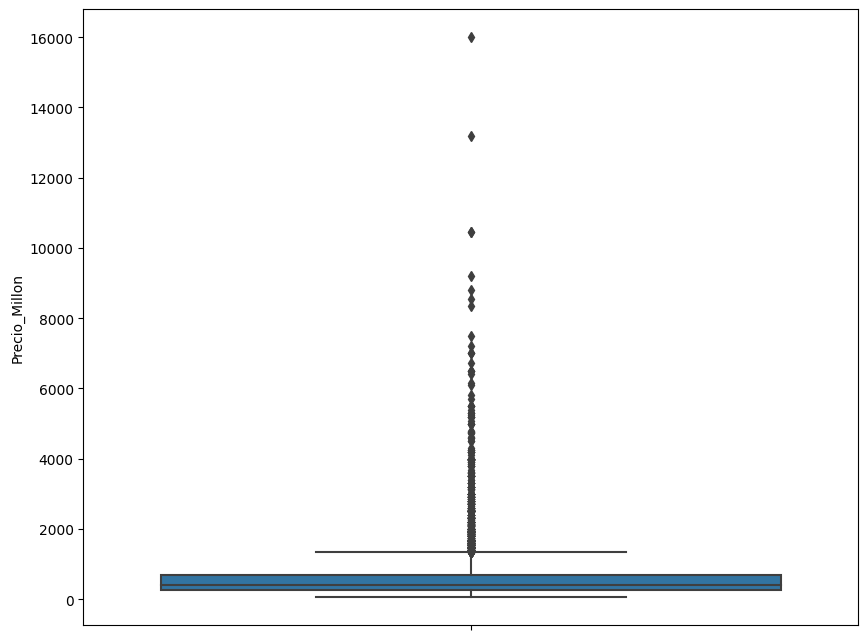

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#Imprime en gráfica los precios en unidades de millón de todos los inmuebles
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio_Millon')
plt.show()

In [31]:
#Se filtran los datos de Prcio_Millon para que no estén muy dispersos
datos_ml = datos_ml.query('Precio_Millon < 1200 & Precio_Millon > 60')
datos_ml

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,COMO_TRANSPORTE_URBANO,SON_INGRESOS_SUFICIENTES,SE_CONSIDERA_POBRE,MED_C19_TRABAJO,MED_C19_CAMBIO_VIVIENDA,MED_C19_ENDEUDAMIENTO,MED_C19_VENTA_BIENES,NIVEL_EDUCATIVO,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,NaN,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,NaN,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,NaN,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00
9,Casa,Casa en venta en Zona Noroccidental,5,2,200,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 580.000.000,$,580000000,...,NaN,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00
10,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 278.000.000,$,278000000,...,NaN,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000,...,NaN,1.52,0.09,1.00,1.00,1.00,1.00,7.77,Verbenal,9.00
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,NaN,1.52,0.09,1.00,1.00,1.00,1.00,7.77,Verbenal,9.00
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,NaN,1.52,0.09,1.00,1.00,1.00,1.00,7.77,Verbenal,9.00
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000,...,NaN,1.52,0.09,1.00,1.00,1.00,1.00,7.77,Verbenal,9.00


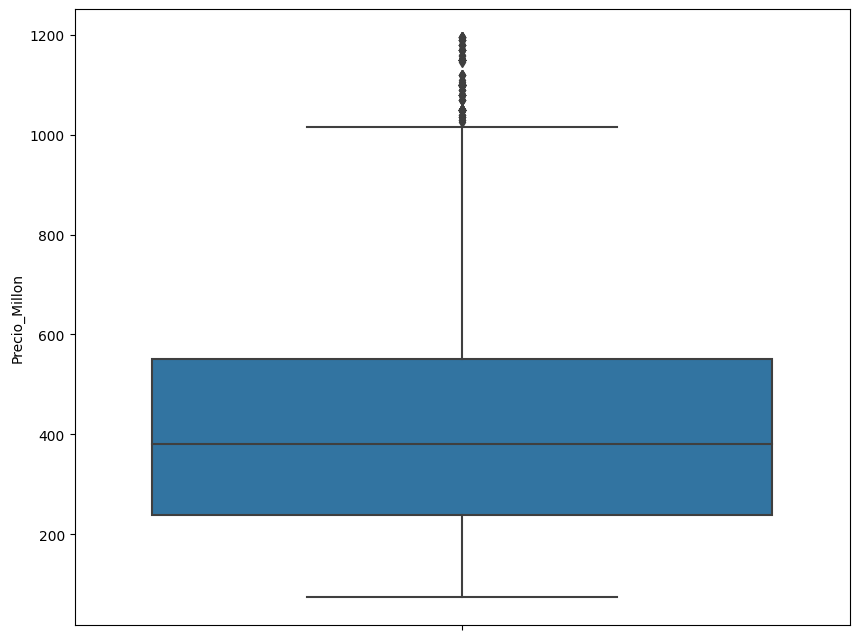

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio_Millon')
plt.show()

In [33]:
#Se crea una nueva columna con salarios anuales, no mensuales, y en unidades de millón
datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES']*12/1000000
datos_ml['SALARIO_ANUAL_MI']

0      48.42
1      48.42
3      48.42
9      48.42
10     48.42
        ... 
9313   29.34
9314   29.34
9315   29.34
9316   29.34
9317   29.34
Name: SALARIO_ANUAL_MI, Length: 8313, dtype: float64

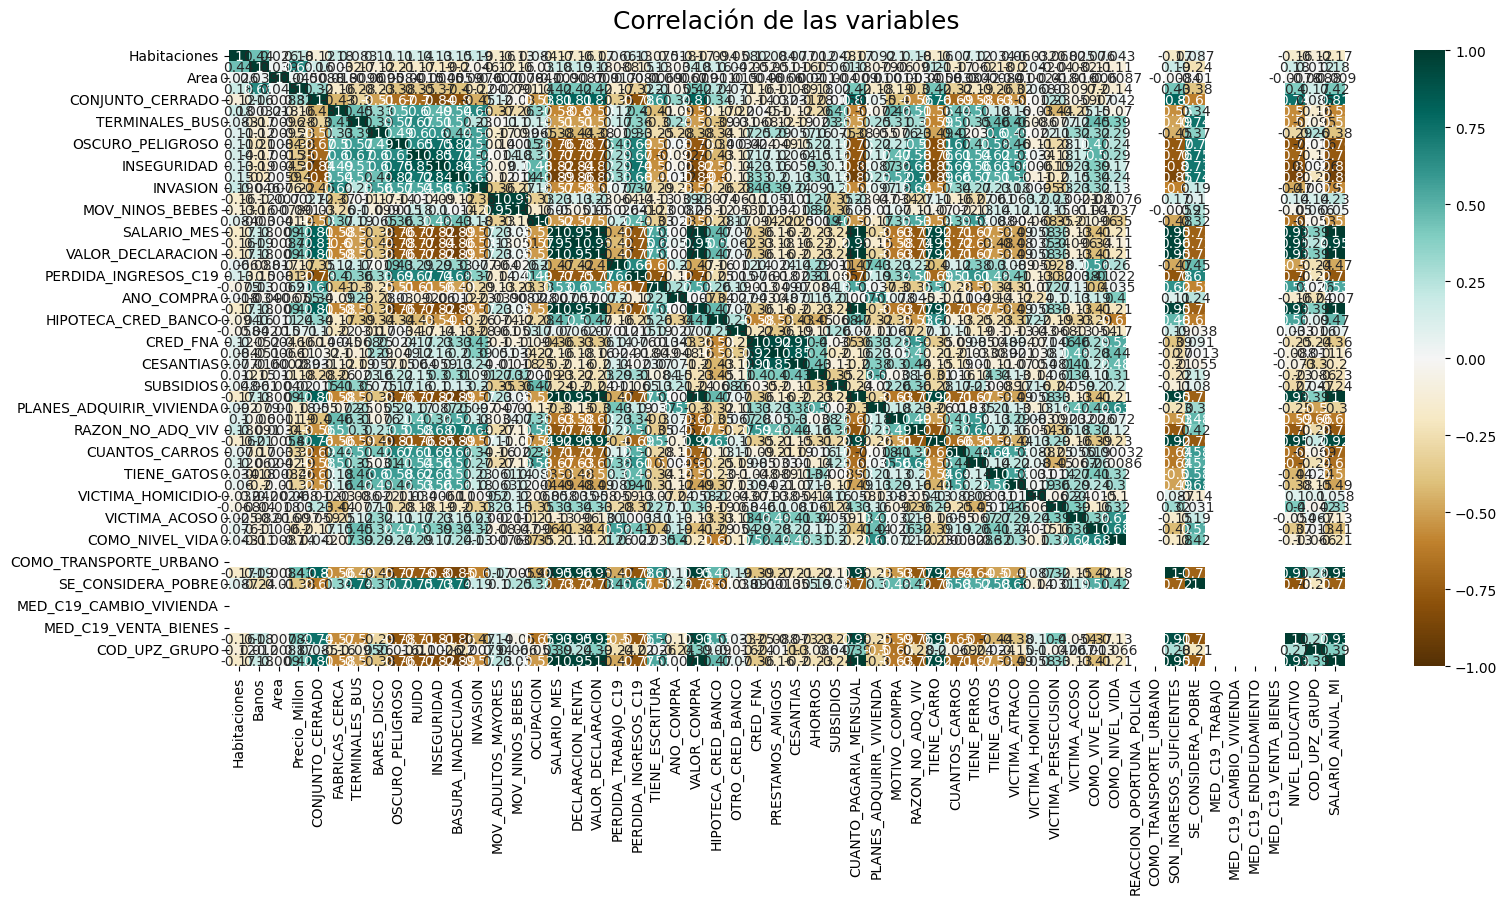

In [35]:
#Veamos el mapa de calor de todas mis variables
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

In [39]:
#Comencemos con el modelo ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Seleccionar las características que se usarán como entrada del modelo
index = ['NOMBRE_ESTRATO', 'CONJUNTO_CERRADO', 'FABRICAS_CERCA',
            'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO', 'RUIDO', 'INSEGURIDAD',
            'BASURA_INADECUADA', 'INVASION', 'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES',
            'OCUPACION', 'SALARIO_MES', 'DECLARACION_RENTA', 'VALOR_DECLARACION',
            'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19', 'TIENE_ESCRITURA', 'ANO_COMPRA',
            'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO', 'OTRO_CRED_BANCO', 'CRED_FNA',
            'PRESTAMOS_AMIGOS', 'CESANTIAS', 'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
            'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV', 'TIENE_CARRO',
            'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS', 'VICTIMA_ATRACO',
            'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION', 'VICTIMA_ACOSO', 'COMO_VIVE_ECON',
            'COMO_NIVEL_VIDA', 'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
            'SON_INGRESOS_SUFICIENTES', 'SE_CONSIDERA_POBRE', 'MED_C19_TRABAJO',
            'MED_C19_CAMBIO_VIVIENDA', 'MED_C19_ENDEUDAMIENTO', 'MED_C19_VENTA_BIENES',
            'NIVEL_EDUCATIVO','Precio_Millon']

# Seleccionar el atributo que se quiere predecir
objetivo = 'Precio_Millon'

# Dividir el data frame en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos_ml[index], datos_ml[objetivo], test_size=0.2)

# Crear un modelo de regresión logística y entrenarlo con los datos de entrenamiento
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir los precios del conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
precision = accuracy_score(y_test, y_pred)

print('Precisión del modelo:', precision)

ValueError: ignored

In [42]:
columnas1 = {'Fontibón':'Fontibon'}
datos_ml = datos_ml.rename(columns=columnas1)
datos_ml.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,SON_INGRESOS_SUFICIENTES,SE_CONSIDERA_POBRE,MED_C19_TRABAJO,MED_C19_CAMBIO_VIVIENDA,MED_C19_ENDEUDAMIENTO,MED_C19_VENTA_BIENES,NIVEL_EDUCATIVO,NOMBRE_ESTRATO,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
9087,Apartamento,Apartamento en venta en Portales Del Norte,3,2,69,Portales Del Norte,Britalia,$ 295.000.000,$,295000000,...,1.85,0.03,1.00,NaN,1.00,1.00,10.02,Britalia,18.00,39.74
4358,Apartamento,Apartamento en venta en Kennedy,3,2,89,Kennedy,Kennedy Central,$ 385.000.000,$,385000000,...,0.91,0.11,1.00,1.00,1.00,1.00,8.04,Kennedy Central,47.00,25.73
8947,Casa,Casa en venta en Boyaca,3,3,290,Boyaca,Boyacá Real,$ 650.000.000,$,650000000,...,1.29,0.11,1.00,NaN,1.00,NaN,8.69,Boyacá Real,30.00,33.94
2283,Casa,Casa en venta en Usaquén,4,3,159,Usaquén,Usaquén,$ 630.000.000,$,630000000,...,2.32,0.02,1.00,NaN,1.00,1.00,10.93,Usaquén,14.00,56.05
5153,Casa,Casa en venta en Teusaquillo,6,6,319,Teusaquillo,Teusaquillo,$ 1.100.000.000,$,1100000000,...,1.69,0.05,1.00,1.00,1.00,1.00,10.23,Teusaquillo,101.00,29.99
8248,Apartamento,Apartamento en venta en Bosa,3,2,52,Bosa,Bosa Central,$ 160.000.000,$,160000000,...,0.56,0.40,1.00,1.00,1.00,1.00,5.65,Bosa Central,85.00,10.81
4426,Apartamento,Apartamento en venta en Kennedy,3,2,71,Kennedy,Kennedy Central,$ 355.000.000,$,355000000,...,0.91,0.11,1.00,1.00,1.00,1.00,8.04,Kennedy Central,47.00,25.73
4437,Casa,Casa en venta en Kennedy,4,4,170,Kennedy,Kennedy Central,$ 520.000.000,$,520000000,...,0.91,0.11,1.00,1.00,1.00,1.00,8.04,Kennedy Central,47.00,25.73
866,Casa,Casa en venta en Zona Noroccidental,4,2,73,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 199.000.000,$,199000000,...,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42
950,Casa,Casa en venta en Zona Noroccidental,3,3,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 400.000.000,$,400000000,...,1.72,0.04,1.00,1.00,1.00,1.00,10.40,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42


In [47]:
#Comencemos con el modelo ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Seleccionar las características que se usarán como entrada del modelo
index = ['COD_UPZ_GRUPO']

# Seleccionar el atributo que se quiere predecir
objetivo = 'Valor'

# Dividir el data frame en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos_ml[index], datos_ml[objetivo], test_size=0.2)

# Crear un modelo de regresión logística y entrenarlo con los datos de entrenamiento
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir los precios del conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
precision = accuracy_score(y_test, y_pred)

print('Precisión del modelo:', precision)

Precisión del modelo: 0.016235718580877932


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# MODELO ARBOLES DE DECISION

In [52]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8313 entries, 0 to 9317
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo                       8313 non-null   object 
 1   Descripcion                8313 non-null   object 
 2   Habitaciones               8313 non-null   int64  
 3   Banos                      8313 non-null   int64  
 4   Area                       8313 non-null   int64  
 5   Barrio                     8313 non-null   object 
 6   UPZ                        8313 non-null   object 
 7   Valor                      8313 non-null   object 
 8   Moneda                     8313 non-null   object 
 9   Precio                     8313 non-null   object 
 10  Precio_Millon              8313 non-null   float64
 11  CONJUNTO_CERRADO           8313 non-null   float64
 12  FABRICAS_CERCA             8313 non-null   float64
 13  TERMINALES_BUS             8313 non-null   float

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones', 'Banos', 'Area', 'CONJUNTO_CERRADO', 'FABRICAS_CERCA', 'TIENE_ESCRITURA', 'TERMINALES_BUS', 'BARES_DISCO']]
#X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']]
y = datos_ml['Precio_Millon']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árboles de decisión
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

# Evaluar el desempeño del modelo
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse


136.85544314218347

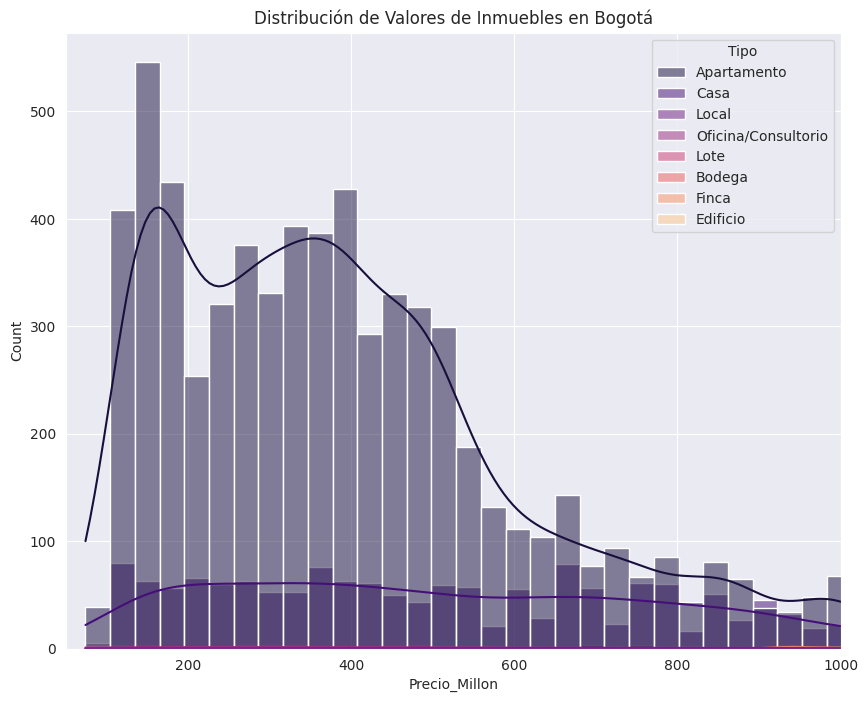

In [58]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
grafica = sns.histplot(data=datos_ml, x='Precio_Millon', kde=True, hue='Tipo',palette='magma')
grafica.set_title('Distribución de Valores de Inmuebles en Bogotá')
#Limitamos el eje x para mostrar datos más relevantes
plt.xlim((50,1000))
#plt.ylim((0,20))

plt.savefig('/content/drive/MyDrive/inmersion_datos/Tablas/valor_millon_inmuebles.png',format='png')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has

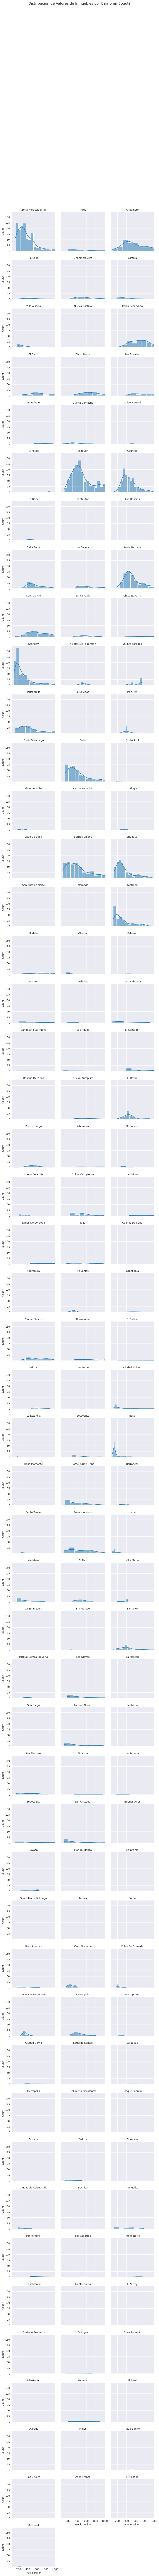

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

g = sns.FacetGrid(datos_ml, col='Barrio', col_wrap=3)
g.map(sns.histplot, 'Precio_Millon', kde=True, palette='magma')
g.set_titles('{col_name}')

plt.xlim((50, 1000))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribución de Valores de Inmuebles por Barrio en Bogotá', fontsize=14)

plt.savefig('/content/drive/MyDrive/inmersion_datos/Tablas/valor_millon_inmuebles_por_barrio.png', format='png')
plt.show()

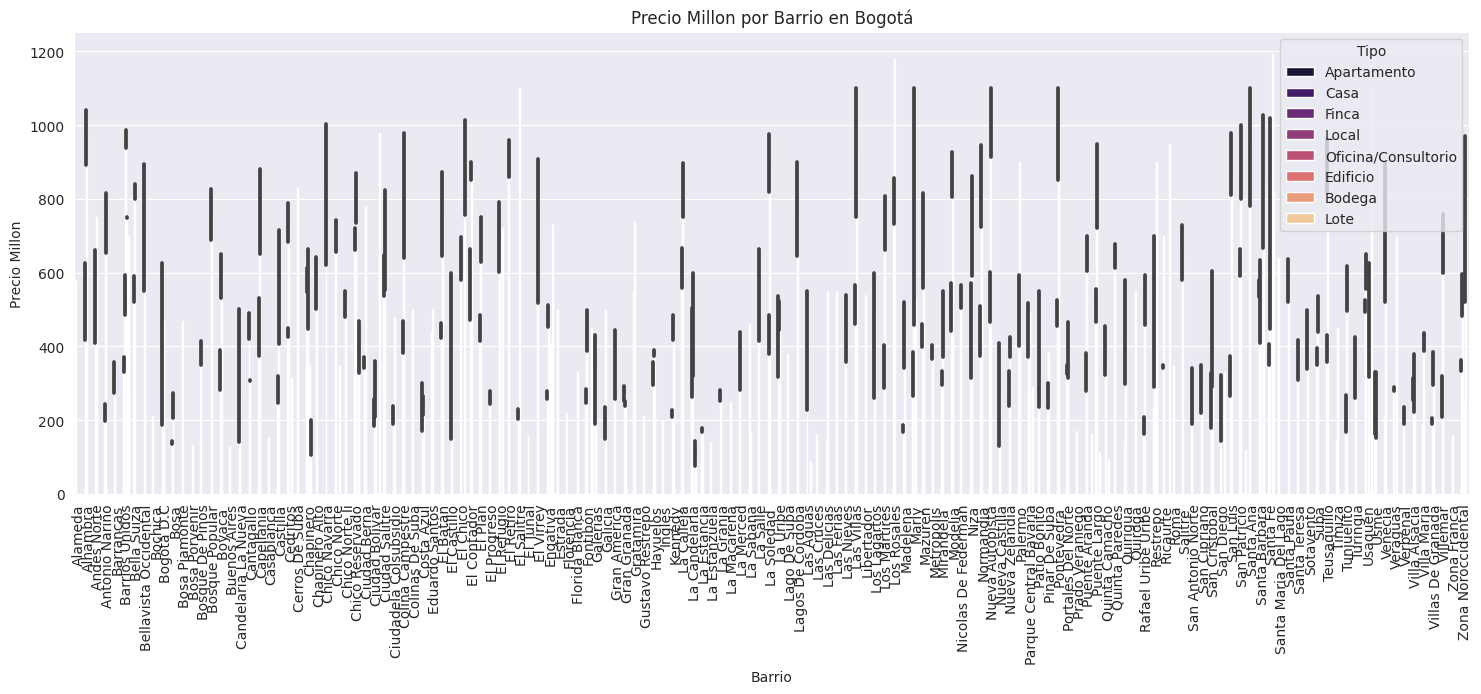

In [62]:
# Se obtiene el número de inmuebles por barrio
inmuebles_por_barrio = datos_ml['Barrio'].value_counts()

# Se ordena el dataframe de acuerdo al número de inmuebles
datos_ordenados = datos_ml.loc[datos_ml['Barrio'].isin(inmuebles_por_barrio.index)].sort_values(by=['Barrio'])

# Se crea la gráfica utilizando sns.barplot()
sns.set_style('darkgrid')
plt.figure(figsize=(18,6))
sns.barplot(data=datos_ordenados, x='Barrio', y='Precio_Millon', hue='Tipo', palette='magma')

# Se ajustan los ejes y se rota el texto de los barrios para que no se superpongan
plt.xticks(rotation=90)
plt.ylabel('Precio Millon')
plt.xlabel('Barrio')
plt.xlim(-0.5, len(inmuebles_por_barrio) - 0.5)

# Se establece un título para la gráfica
plt.title('Precio Millon por Barrio en Bogotá')

# Se guarda la gráfica en un archivo png
plt.savefig('/content/drive/MyDrive/inmersion_datos/Tablas/precio_millon_por_barrio.png', format='png')

plt.show()



<h1>Conclusiones</h1>
<p> Estudié dos modelos de ML, el Modelo de Regresión Logística y el Modelos de Árboles de Decisión. El primero dio como resultado que se necesitan más datos para obtener una aproximanción adecuada, no se puede implementar para este caso. El segundo me indica un error de 136 millones en el resultado, apenas poco por encima del menor error obtenido en clases con el modelo de Regresión lineal (118 millones)</p>

<p>Con los modelos implementados, se puede concluir que faltan datos para generar un modelo predictivo adecuado, además aún falta por probar otros algoritmos.</p>